In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,BaggingRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb



from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Uploading the dataset


In [ ]:
df = pd.read_csv('../data/ai_job_dataset.csv')

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

# PREPROCESSING

# Checking for missing values and duplicates

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace = True)

In [ ]:
dic = {}
for i in df.columns.tolist():
  if len(df[i].value_counts())<20:
    dic.update({i : df[i].value_counts()})
    print(i,str(df[i].value_counts()))

salary_currency salary_currency
USD    11957
EUR     2314
GBP      729
Name: count, dtype: int64
experience_level experience_level
MI    3781
EX    3760
SE    3741
EN    3718
Name: count, dtype: int64
employment_type employment_type
FT    3812
FL    3758
CT    3721
PT    3709
Name: count, dtype: int64
company_size company_size
S    5007
L    4998
M    4995
Name: count, dtype: int64
remote_ratio remote_ratio
0      5075
50     5005
100    4920
Name: count, dtype: int64
education_required education_required
Bachelor     3789
Associate    3785
Master       3748
PhD          3678
Name: count, dtype: int64
industry industry
Retail                1063
Media                 1045
Automotive            1020
Consulting            1020
Technology            1011
Real Estate           1007
Government             998
Transportation         997
Telecommunications     997
Healthcare             997
Finance                984
Energy                 976
Gaming                 967
Manufacturing         

# Standardizing the Job Titles

In [ ]:
print(df['job_title'].unique())

['AI Research Scientist' 'AI Software Engineer' 'AI Specialist'
 'NLP Engineer' 'AI Consultant' 'AI Architect' 'Principal Data Scientist'
 'Data Analyst' 'Autonomous Systems Engineer' 'AI Product Manager'
 'Machine Learning Engineer' 'Data Engineer' 'Research Scientist'
 'ML Ops Engineer' 'Robotics Engineer' 'Head of AI'
 'Deep Learning Engineer' 'Data Scientist' 'Machine Learning Researcher'
 'Computer Vision Engineer']


In [ ]:

mapping = {
    "AI Research Scientist": "Research Scientist",
    "Research Scientist": "Research Scientist",
    "Principal Data Scientist": "Data Scientist",
    "Data Scientist": "Data Scientist",
    "Machine Learning Researcher": "Research Scientist",

    "AI Software Engineer": "AI Engineer",
    "AI Specialist": "AI Engineer",
    "NLP Engineer": "AI Engineer",
    "Deep Learning Engineer": "AI Engineer",
    "Computer Vision Engineer": "AI Engineer",
    "Autonomous Systems Engineer": "AI Engineer",
    "ML Ops Engineer": "AI Engineer",
    "Machine Learning Engineer": "Machine Learning Engineer",

    "Data Analyst": "Data Analyst",
    "Data Engineer": "Data Engineer",

    "AI Consultant": "AI Consultant",
    "AI Architect": "AI Architect",
    "Robotics Engineer": "Robotics Engineer",
    "AI Product Manager": "AI Product Manager",
    "Head of AI": "Head of AI"
}


df["job_title"] = df["job_title"].replace(mapping)

print(df['job_title'].unique())


['Research Scientist' 'AI Engineer' 'AI Consultant' 'AI Architect'
 'Data Scientist' 'Data Analyst' 'AI Product Manager'
 'Machine Learning Engineer' 'Data Engineer' 'Robotics Engineer'
 'Head of AI']


# Converting the Salaries to $USD


In [ ]:
salarys = df['salary_currency'].unique()


for i in range(len(df)):

  if df.loc[i, 'salary_currency'] == 'EUR':
    df.loc[i, 'salary_usd'] = df.loc[i, 'salary_usd'] * 1.17

  elif df.loc[i, 'salary_currency'] == 'GBP':
    df.loc[i, 'salary_usd'] = df.loc[i, 'salary_usd'] * 1.35

  df.loc[i,'salary_currency'] ='USD'
print(df['salary_currency'].value_counts())

/tmp/ipython-input-2552802299.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '63910.079999999994' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'salary_usd'] = df.loc[i, 'salary_usd'] * 1.17


salary_currency
USD    15000
Name: count, dtype: int64


In [ ]:

df["posting_date"] = pd.to_datetime(df["posting_date"])
df["application_deadline"] = pd.to_datetime(df["application_deadline"])
df["job_demand_period"] = (df["application_deadline"] - df["posting_date"]).dt.days
print(df['job_demand_period'])

0        20
1        52
2        20
3        63
4        69
         ..
14995    47
14996    14
14997    44
14998    32
14999    23
Name: job_demand_period, Length: 15000, dtype: int64


In [ ]:

df["skill_count"] = df["required_skills"].str.split(",").str.len()
print(df['skill_count'])

0        5
1        5
2        5
3        4
4        4
        ..
14995    3
14996    4
14997    3
14998    4
14999    5
Name: skill_count, Length: 15000, dtype: int64


# Exploratory Data Analysis

In [ ]:
print(df.head())
print(df.info())




    job_id           job_title  salary_usd salary_currency experience_level  \
0  AI00001  Research Scientist    90376.00             USD               SE   
1  AI00002         AI Engineer    61895.00             USD               EN   
2  AI00003         AI Engineer   152626.00             USD               MI   
3  AI00004         AI Engineer    80215.00             USD               SE   
4  AI00005       AI Consultant    63910.08             USD               EN   

  employment_type company_location company_size employee_residence  \
0              CT            China            M              China   
1              CT           Canada            M            Ireland   
2              FL      Switzerland            L        South Korea   
3              FL            India            M              India   
4              PT           France            S          Singapore   

   remote_ratio  ... education_required years_experience    industry  \
0            50  ...           B

# Exporting A DataFrame

In [ ]:
df.to_csv("output_file.csv", index=False)

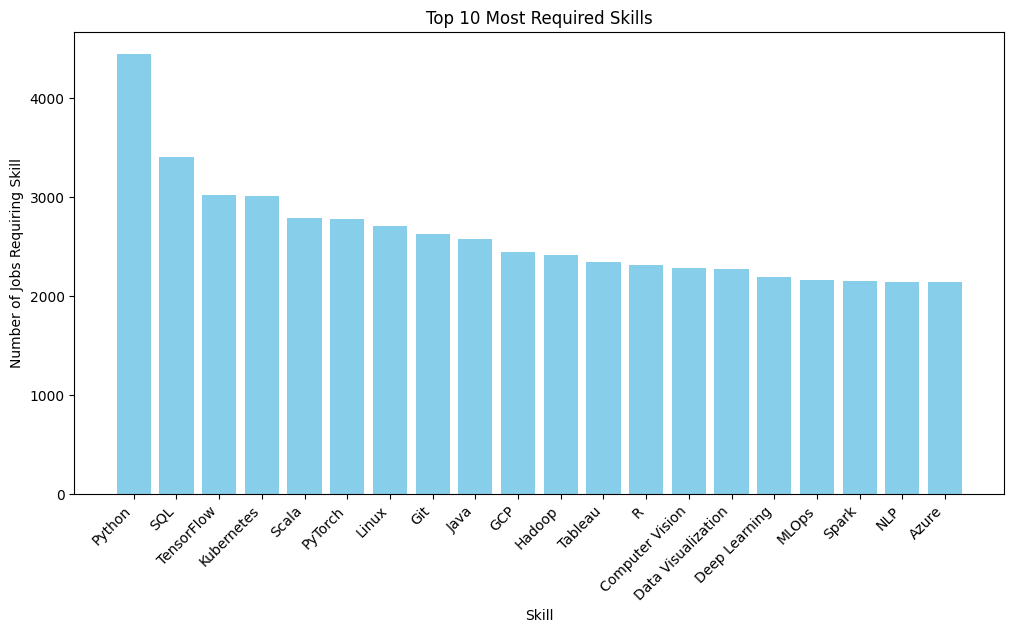

In [ ]:

from collections import Counter

all_skills = df['required_skills'].dropna().apply(lambda x: x.split(', '))
all_skills_flat = [skill for sublist in all_skills for skill in sublist]

skill_counts = Counter(all_skills_flat)

skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(skill_df['Skill'][:20], skill_df['Count'][:20], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Required Skills")
plt.xlabel("Skill")
plt.ylabel("Number of Jobs Requiring Skill")
plt.show()


In [ ]:
df_roles = df.groupby('job_title').agg({
    'salary_usd':'mean'
}).reset_index()

df_industry = df.groupby('industry').agg({
    'salary_usd':'mean'
}).reset_index()

df_conSize = df.groupby('company_size').agg({
    'salary_usd':'mean'
}).reset_index()

df_location = df.groupby('company_location').agg({
    'salary_usd':'mean'
}).reset_index()


df_empType = df.groupby('employment_type').agg({
    'salary_usd':'mean'
}).reset_index()


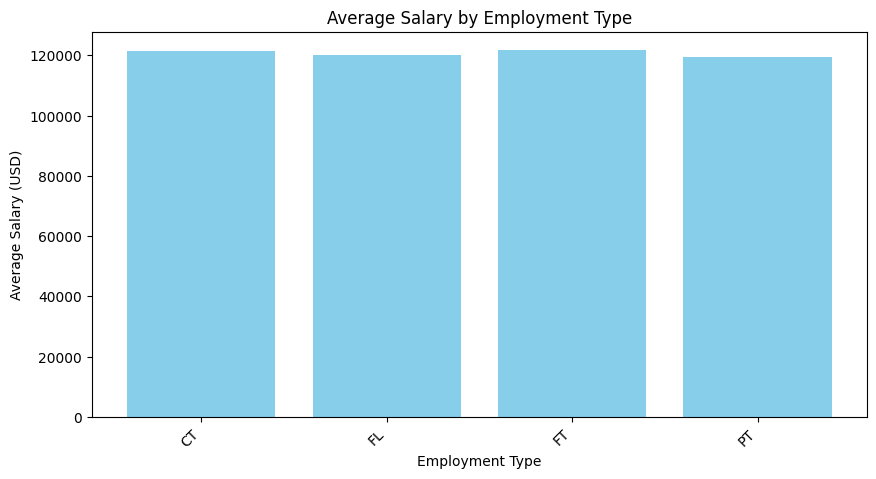

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(df_empType["employment_type"], df_empType["salary_usd"], color="skyblue")

plt.title("Average Salary by Employment Type")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Employment Type")
plt.xticks(rotation=45, ha="right")
plt.show()


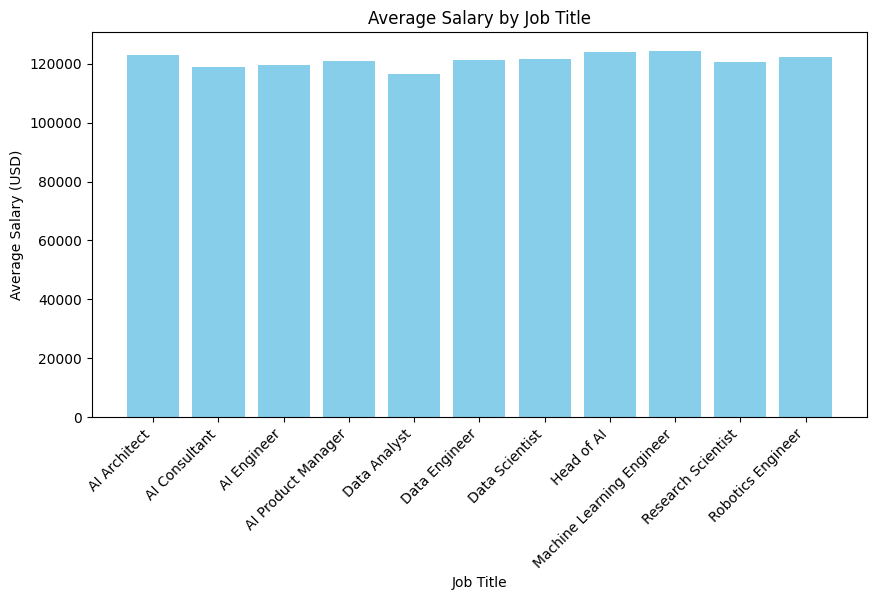

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(df_roles["job_title"], df_roles["salary_usd"], color="skyblue")

plt.title("Average Salary by Job Title")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Job Title")
plt.xticks(rotation=45, ha="right")
plt.show()


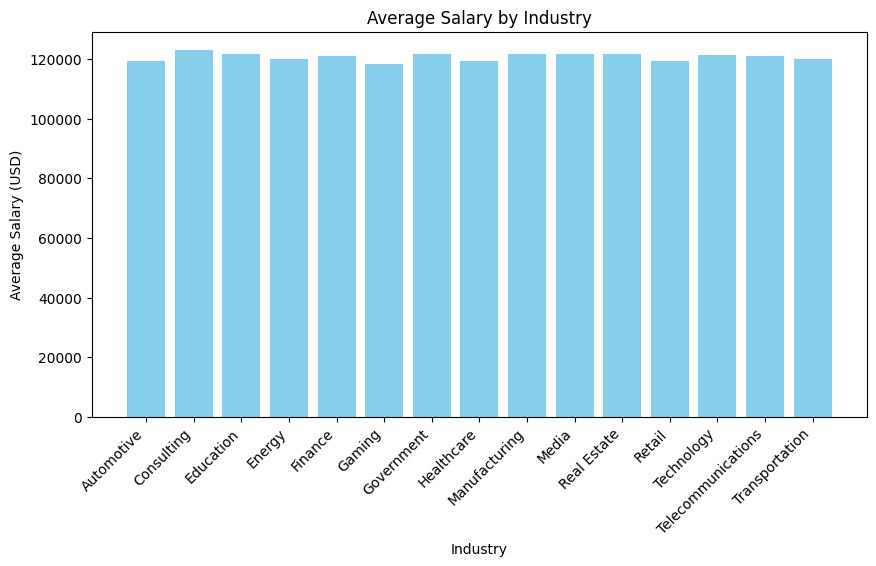

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(df_industry["industry"], df_industry["salary_usd"], color="skyblue")

plt.title("Average Salary by Industry")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Industry")
plt.xticks(rotation=45, ha="right")
plt.show()


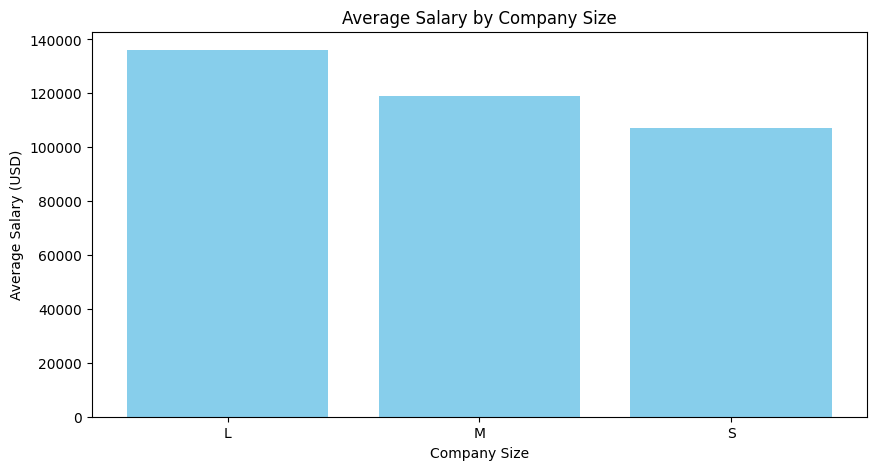

In [ ]:

plt.figure(figsize=(10,5))
plt.bar(df_conSize["company_size"], df_conSize["salary_usd"], color="skyblue")

plt.title("Average Salary by Company Size")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Company Size")
plt.show()


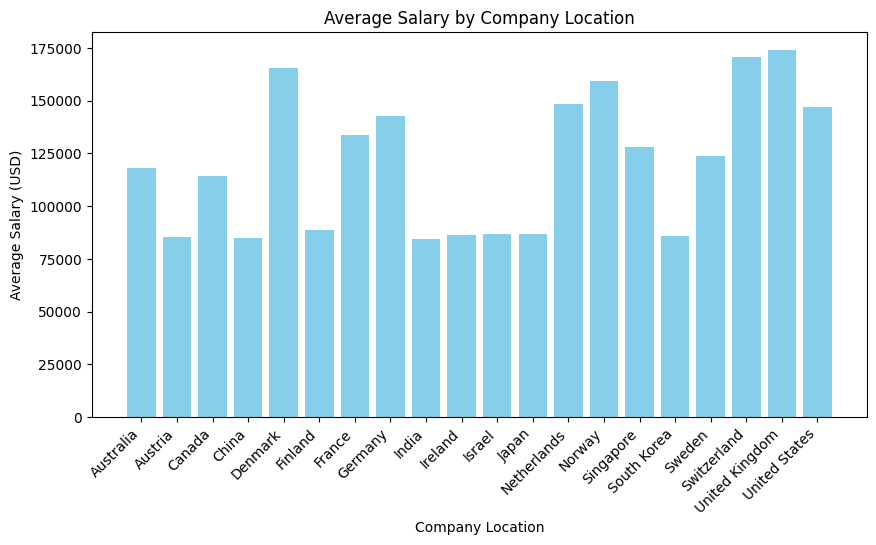

In [ ]:

plt.figure(figsize=(10,5))
plt.bar(df_location["company_location"], df_location["salary_usd"], color="skyblue")

plt.title("Average Salary by Company Location")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Company Location")
plt.xticks(rotation=45, ha="right")

plt.show()


# Remote Ration Comparison

In [ ]:

df_salary_remote = df.groupby("remote_ratio").agg({
    'salary_usd':'mean',
    'benefits_score':'mean'
}).reset_index()


In [ ]:
mapping = {0: "On-site", 50: "Hybrid", 100: "Remote"}
df_salary_remote["work_type"] = df_salary_remote["remote_ratio"].map(mapping)


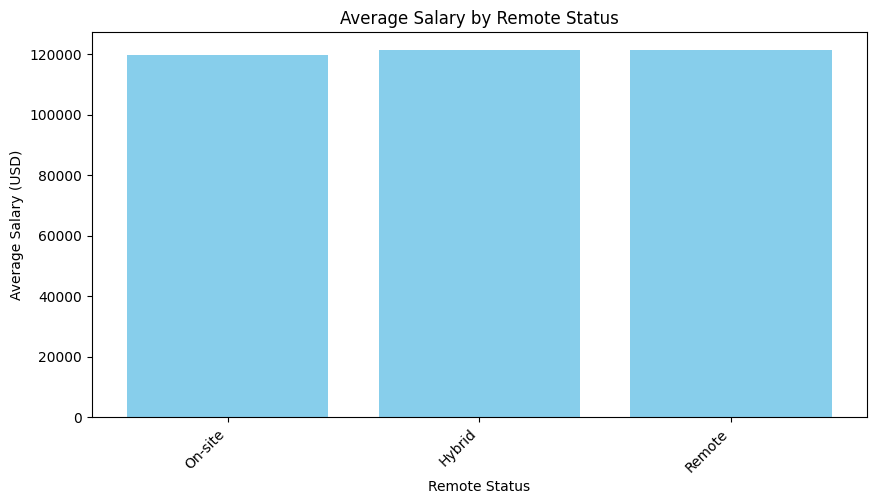

In [ ]:

plt.figure(figsize=(10,5))
plt.bar(df_salary_remote["work_type"], df_salary_remote["salary_usd"], color="skyblue")

plt.title("Average Salary by Remote Status")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Remote Status")
plt.xticks(rotation=45, ha="right")

plt.show()


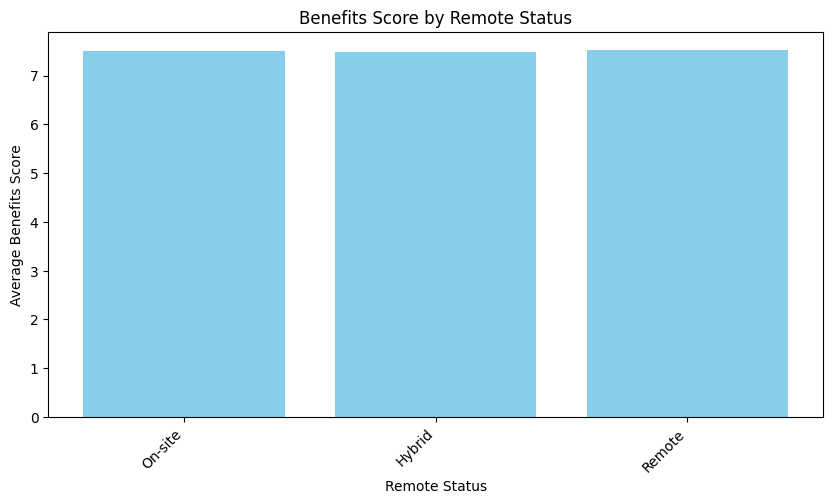

In [ ]:

plt.figure(figsize=(10,5))
plt.bar(df_salary_remote["work_type"], df_salary_remote["benefits_score"], color="skyblue")

plt.title("Benefits Score by Remote Status")
plt.ylabel("Average Benefits Score")
plt.xlabel("Remote Status")
plt.xticks(rotation=45, ha="right")

plt.show()


                     years_experience  education_level_num  salary_usd
years_experience             1.000000            -0.018139    0.719430
education_level_num         -0.018139             1.000000   -0.009799
salary_usd                   0.719430            -0.009799    1.000000


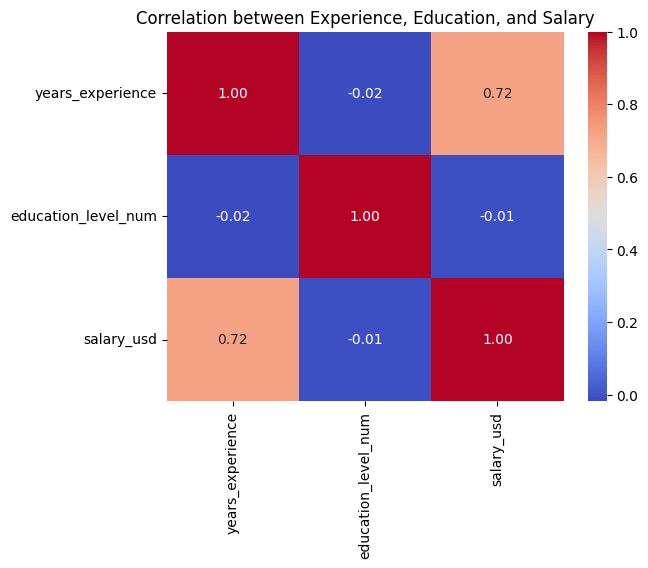

In [ ]:

edu_mapping = {"High School": 0, "Bachelor": 1, "Master": 2, "PhD": 3}
df["education_level_num"] = df["education_required"].map(edu_mapping)

corr = df[["years_experience", "education_level_num", "salary_usd"]].corr()
print(corr)


sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Experience, Education, and Salary")
plt.show()


# FEATURE SELECTION AND SPLITING OF THE MODEL

In [ ]:
df_copy = df[['company_location','company_size','skill_count','experience_level','education_required','benefits_score','salary_usd','years_experience']]
print(df_copy.info())
print(df_copy['company_location'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_location    15000 non-null  object 
 1   company_size        15000 non-null  object 
 2   skill_count         15000 non-null  int64  
 3   experience_level    15000 non-null  object 
 4   education_required  15000 non-null  object 
 5   benefits_score      15000 non-null  float64
 6   salary_usd          15000 non-null  float64
 7   years_experience    15000 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 937.6+ KB
None
['China' 'Canada' 'Switzerland' 'India' 'France' 'Germany'
 'United Kingdom' 'Singapore' 'Austria' 'Sweden' 'South Korea' 'Norway'
 'Netherlands' 'United States' 'Israel' 'Australia' 'Ireland' 'Denmark'
 'Finland' 'Japan']


# Encoding of categorical variables and Standardization

In [ ]:

df_copy2 = df_copy.copy()

df_copy2['HighPaying'] = df['salary_usd'] >= df['salary_usd'].median()

df_copy2.drop(columns=['salary_usd'],inplace=True)

cat_var_copy = df_copy2.select_dtypes(include=['object']).columns.tolist()

num_var_copy = df_copy2.select_dtypes(include=['float64','int64']).columns.tolist()


X_copy = df_copy2.drop(columns=['HighPaying'])
y_copy = df_copy2['HighPaying']

print(X_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_location    15000 non-null  object 
 1   company_size        15000 non-null  object 
 2   skill_count         15000 non-null  int64  
 3   experience_level    15000 non-null  object 
 4   education_required  15000 non-null  object 
 5   benefits_score      15000 non-null  float64
 6   years_experience    15000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 820.4+ KB
None


In [ ]:

X= df_copy.drop(columns=['salary_usd'])
y = df_copy['salary_usd']

X


,company_location,company_size,skill_count,experience_level,education_required,benefits_score,years_experience
0,China,M,5,SE,Bachelor,5.9,9
1,Canada,M,5,EN,Master,5.2,1
2,Switzerland,L,5,MI,Associate,9.4,2
3,India,M,4,SE,PhD,8.6,7
4,France,S,4,EN,Master,6.6,0
...,...,...,...,...,...,...,...
14995,Finland,S,3,EN,Bachelor,7.9,1
14996,United Kingdom,M,4,EN,Master,8.2,0
14997,South Korea,L,3,EX,Associate,7.4,17
14998,Netherlands,M,4,EN,PhD,5.6,1


In [ ]:
cat_var = df_copy.select_dtypes(include=['object']).columns.tolist()

print(cat_var)
num_var = df_copy.select_dtypes(include=['float64','int64']).columns.tolist()
num_var.remove('salary_usd')


for column in cat_var:
  df_copy = pd.get_dummies(df_copy, columns=[column], drop_first= True, dtype=int)





['company_location', 'company_size', 'experience_level', 'education_required']


In [ ]:
X_r = df_copy.drop(columns=['salary_usd'])
y_r = df_copy['salary_usd']

print(num_var)
print(cat_var)





['skill_count', 'benefits_score', 'years_experience']
['company_location', 'company_size', 'experience_level', 'education_required']


In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)


scaler = StandardScaler()


X_train_r_sc = scaler.fit_transform(X_train_r)

X_test_r_sc = scaler.transform(X_test_r)


#MODEL SELECTION FOR REGRESSION

In [ ]:


models_and_parameters = {
    "LinearRegression": (
        LinearRegression(),
        {
            "fit_intercept": [True, False]
        }
    ),

    "Ridge": (
        Ridge(),
        {
            "alpha": [0.1, 1.0, 10.0]
        }
    ),

    "KNN": (
        KNeighborsRegressor(),
        {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    ),

    "Bagging_DecisionTree": (
        BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42),
        {
            "n_estimators": [10, 50, 100],
            "max_samples": [0.5, 0.7, 1.0],
            "estimator__max_depth": [3, 5, 7]
        }
    ),

    "RandomForest": (
        RandomForestRegressor(random_state=42),
        {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20]
        }
    ),

    "GradientBoosting": (
        GradientBoostingRegressor(random_state=42),
        {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3, 5, 7],
            "subsample": [0.8, 1.0]
        }
    ),

    "XGBoost": (
        xgb.XGBRegressor(eval_metric="rmse", random_state=42),
        {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        }
    ),
}

results = {}

for name, (model, params) in models_and_parameters.items():
    print(f"\n🔎 Running GridSearch for {name}...")
    grid = GridSearchCV(model, params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    grid.fit(X_train_r_sc, y_train_r)

    best_model = grid.best_estimator_


    y_pred_r = best_model.predict(X_test_r_sc)

    # Compute metrics
    r2 = r2_score(y_test_r, y_pred_r)
    rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
    mae = mean_absolute_error(y_test_r, y_pred_r)

    results[name] = {
        "best_params": grid.best_params_,
        "best_estimator": grid.best_estimator_,
        "CV_MSE": -grid.best_score_,   # cross-validation MSE
        "R2": r2,
        "RMSE": rmse,
        "MAE": mae
    }



🔎 Running GridSearch for LinearRegression...

🔎 Running GridSearch for Ridge...

🔎 Running GridSearch for KNN...

🔎 Running GridSearch for Bagging_DecisionTree...

🔎 Running GridSearch for RandomForest...

🔎 Running GridSearch for GradientBoosting...

🔎 Running GridSearch for XGBoost...


In [ ]:
metrics_df = pd.DataFrame({
    model: {
        "CV_MSE": res["CV_MSE"],
        "R2": res["R2"],
        "RMSE": res["RMSE"],
        "MAE": res["MAE"]
    }
    for model, res in results.items()
}).T



metrics_df

,CV_MSE,R2,RMSE,MAE
LinearRegression,6.293174e+08,0.849245,25017.890402,18280.182114
Ridge,6.293174e+08,0.849244,25017.903827,18280.107348
KNN,5.394477e+08,0.875705,22716.473317,16156.316750
Bagging_DecisionTree,9.375633e+08,0.779451,30259.821723,23034.212974
RandomForest,5.630853e+08,0.861161,24008.793249,16571.267051
GradientBoosting,4.617173e+08,0.887525,21609.377116,15512.490033
XGBoost,4.637783e+08,0.888641,21501.888789,15451.225874


In [ ]:
df_class = df_copy.copy()

df_class['HighPaying'] = df['salary_usd'] >= df['salary_usd'].median()


df_class = pd.get_dummies(df_class, columns=['HighPaying'], drop_first= True, dtype=int)





# Building the Classification Models

In [ ]:
cat_var2 = df_class.select_dtypes(include=['object']).columns.tolist()
print(cat_var)
for column in cat_var2:
  df_class = pd.get_dummies(df_class, columns=[column], drop_first= True, dtype=int)

df_class = df_class.drop(columns=['salary_usd'])



['company_location', 'company_size', 'experience_level', 'education_required']


In [ ]:
X_c = df_class.drop(columns=['HighPaying_True'])
y_c = df_class['HighPaying_True']



In [ ]:
X_train_c, X_test_c, y_train_c, y_test_C = train_test_split(X_c, y_c, test_size=0.2, random_state=42)


scaler = StandardScaler()


X_train_c = scaler.fit_transform(X_train_c)

X_test_c = scaler.transform(X_test_c)


In [ ]:
models_and_parameters_cls = {
    "LogisticRegression": (
        LogisticRegression(max_iter=500, random_state=42),
        {
            "C": [0.1, 1, 10],
            "penalty": ["l2"],   # l1 only works with some solvers
            "solver": ["lbfgs", "liblinear"]
        }
    ),

    "KNN": (
        KNeighborsClassifier(),
        {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    ),

    "DecisionTree": (
        DecisionTreeClassifier(random_state=42),
        {
            "max_depth": [3, 5, 10, None],
            "criterion": ["gini", "entropy"]
        }
    ),

    "Bagging_DecisionTree": (
        BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42),
        {
            "n_estimators": [10, 50, 100],
            "max_samples": [0.5, 0.7, 1.0],
            "estimator__max_depth": [3, 5, 7]
        }
    ),

    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20]
        }
    ),

    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5]
        }
    ),

    "SVM": (
        SVC(probability=True, random_state=42),
        {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    ),

    "XGBoost": (
        xgb.XGBClassifier(eval_metric="mlogloss", random_state=42),
        {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        }
    ),
}



from sklearn.model_selection import GridSearchCV

results_cls = {}

for name, (model, params) in models_and_parameters_cls.items():
    print(f"\n🔎 Running GridSearch for {name}...")
    grid = GridSearchCV(model, params, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train_c, y_train_c)

    results_cls[name] = {
        "best_params": grid.best_params_,
        "best_score": grid.best_score_,   # already accuracy
        "best_estimator": grid.best_estimator_
    }




🔎 Running GridSearch for LogisticRegression...

🔎 Running GridSearch for KNN...

🔎 Running GridSearch for DecisionTree...

🔎 Running GridSearch for Bagging_DecisionTree...

🔎 Running GridSearch for RandomForest...

🔎 Running GridSearch for GradientBoosting...

🔎 Running GridSearch for SVM...

🔎 Running GridSearch for XGBoost...


In [ ]:

df_scores = pd.DataFrame([
    {"Model": model, "Best Score": details["best_score"]}
    for model, details in results_cls.items()
])

df_scores = df_scores.sort_values(by="Best Score", ascending=False).reset_index(drop=True)

df_scores


# Getting the Parameters from the best Models for Regression and Classification

# GradientBoosting Algorithm to Build The Regression Model

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_var),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_var)

    ]
)

# Full pipeline = preprocessing + model
pipeline_regression = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=300, learning_rate=0.1,
                                        max_depth=3, subsample=0.8, random_state=42))
])


pipeline_regression.fit(X_train,y_train)

y_pred = pipeline_regression.predict(X_test)

# R² score

r2 = r2_score(y_test, y_pred)
print("r^2 score: ",r2)


# LogisticRegression Algorithm For Classification Task

In [ ]:
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)
print(y_copy.info())
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_var_copy),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_var_copy)
    ]
)

Classification_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C=10, penalty='l2', solver='lbfgs', random_state=42
    ))
])


Classification_pipeline.fit(X_train_copy, y_train_copy)


y_pred = Classification_pipeline.predict(X_test_copy)

accuracy = accuracy_score(y_test_copy, y_pred)
print("Accuracy:", accuracy)


# Exporting The model's

In [ ]:

joblib.dump(Classification_pipeline, "classification_model.pkl")
joblib.dump(pipeline_regression, "regression_model.pkl")

In [ ]:
import sklearn
print(sklearn.__version__)
